# Zomato Restaurant


#### Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.


#### The following variables:

• Restaurant Id: Unique id of every restaurant across various cities of the world

• Restaurant Name: Name of the restaurant

• Country Code: Country in which restaurant is located

• City: City in which restaurant is located

• Address: Address of the restaurant

• Locality: Location in the city

• Locality Verbose: Detailed description of the locality

• Longitude: Longitude coordinate of the restaurant&#39;s location

• Latitude: Latitude coordinate of the restaurant&#39;s location

• Cuisines: Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies ��

• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no

• Is delivering: yes/ no

• Switch to order menu: yes/no

• Price range: range of price of food

• Aggregate Rating: Average rating out of 5

• Rating color: depending upon the average rating color

• Rating text: text on the basis of rating of rating

• Votes: Number of ratings casted by people


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score,mean_absolute_error,r2_score
from scipy.stats import skew, boxcox

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# for Country code
df1=pd.read_csv(r"C:\Users\user\Desktop\internship\data\dataset4-main\Country-Code.csv")

In [3]:
# For Zomato data
df2 = pd.read_csv(r"C:\Users\user\Desktop\internship\data\dataset4-main\zomato.csv", encoding='latin1')

In [4]:
df1.head(10)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [5]:
df2.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


We will merge both data df1 and df2 

In [6]:
# Merge the datasets on the 'Country Code' column
df = pd.merge(df2, df1, how='outer')

In [7]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [8]:
df.shape  # checking the shapw of the data set

(9551, 22)

In [9]:
df.columns   # checkinh for all the columns names

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [10]:
df.drop_duplicates(inplace=True)   # Dropping duplicates in data if there is any

In [11]:
df.shape    

(9551, 22)

AS there is no duplicates in the data so the shape of the data remains same.

In [12]:
df.info ()    #checking info of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [13]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [14]:
# Select the relevant columns for analysis
selected_columns = ['Country', 'City', 'Locality', 'Cuisines', 'Average Cost for two', 'Price range']
zomato_selected_df = df[selected_columns].copy()

In [15]:
# Remove rows with missing values
zomato_selected_df.dropna(inplace=True)

In [16]:
zomato_selected_df.columns

Index(['Country', 'City', 'Locality', 'Cuisines', 'Average Cost for two',
       'Price range'],
      dtype='object')

In [17]:
# Converting categorical variables into numerical using one-hot encoding
zomato_encoded_df = pd.get_dummies(zomato_selected_df, drop_first=True)

In [18]:
zomato_selected_df.corr()

,Average Cost for two,Price range
Average Cost for two,1.000000,0.075111
Price range,0.075111,1.000000


In [19]:
zomato_selected_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average Cost for two,9542.0,1200.326137,16128.743876,0.0,250.0,400.0,700.0,800000.0
Price range,9542.0,1.804968,0.905563,1.0,1.0,2.0,2.0,4.0


In [20]:
# Check skewness
skewness = skew(zomato_encoded_df['Average Cost for two'])
print("Skewness before transformation:", skewness)

Skewness before transformation: 35.455688782841825


In [21]:
# Apply Box-Cox transformation to correct skewness
zomato_encoded_df['Average Cost for two'], _ = boxcox(zomato_encoded_df['Average Cost for two'] + 1)

In [22]:
# Check skewness after transformation
skewness_transformed = skew(zomato_encoded_df['Average Cost for two'])
print("Skewness after transformation:", skewness_transformed)


Skewness after transformation: 0.1307467362330567


### Performing EDA

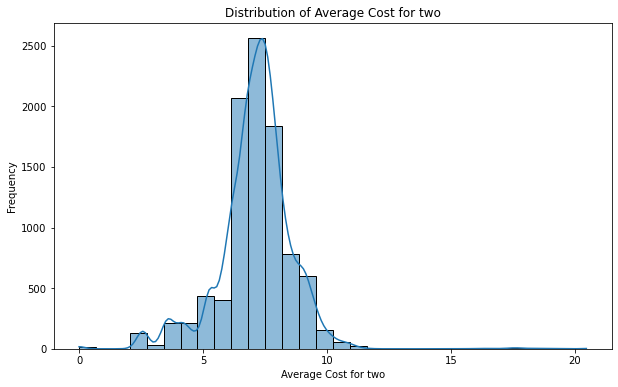

In [23]:
# EDA for Average Cost for two
plt.figure(figsize=(10, 6))
sns.histplot(zomato_encoded_df['Average Cost for two'], bins=30, kde=True)
plt.xlabel('Average Cost for two')
plt.ylabel('Frequency')
plt.title('Distribution of Average Cost for two')
plt.show()

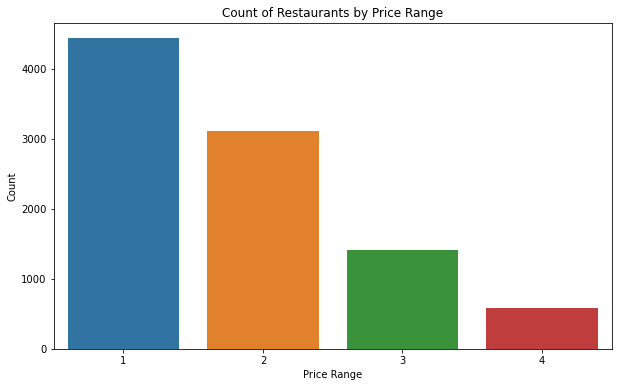

In [24]:
# EDA for Price range
plt.figure(figsize=(10, 6))
sns.countplot(x='Price range', data=zomato_encoded_df)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Count of Restaurants by Price Range')
plt.show()

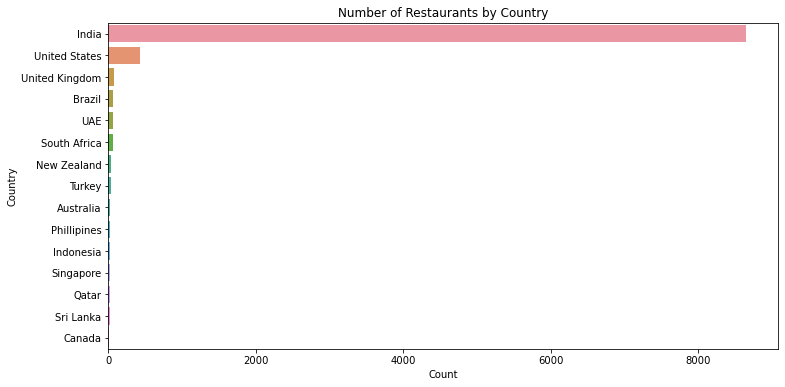

In [25]:
# EDA for Country
country_counts = zomato_selected_df['Country'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Number of Restaurants by Country')
plt.show()

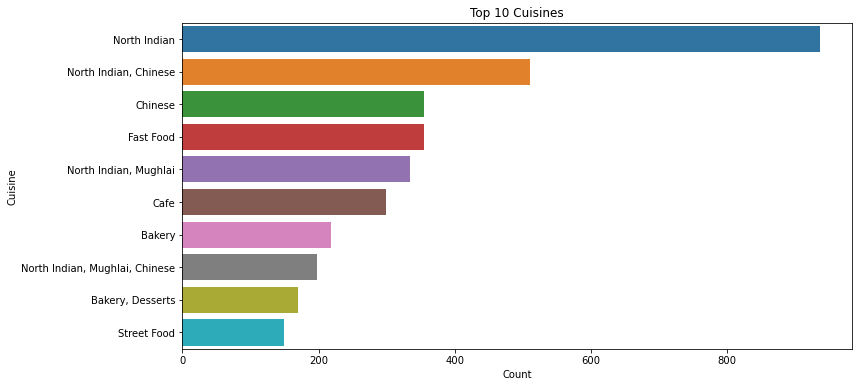

In [26]:
# EDA for Cuisine
top_10_cuisines = zomato_selected_df['Cuisines'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cuisines.values, y=top_10_cuisines.index)
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.title('Top 10 Cuisines')
plt.show()

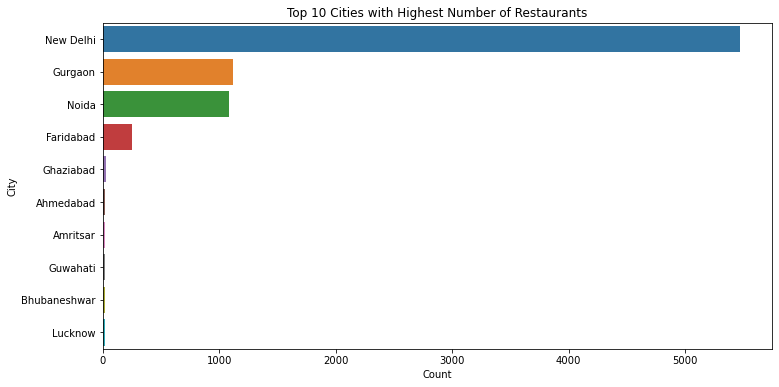

In [27]:
# EDA for City
top_10_cities = zomato_selected_df['City'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index)
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Top 10 Cities with Highest Number of Restaurants')
plt.show()


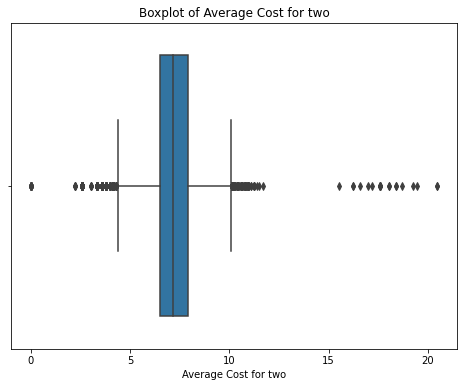

In [28]:
# Check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=zomato_encoded_df['Average Cost for two'])
plt.xlabel('Average Cost for two')
plt.title('Boxplot of Average Cost for two')
plt.show()

In [29]:
# Check for outliers using IQR method
Q1 = zomato_encoded_df['Average Cost for two'].quantile(0.25)
Q3 = zomato_encoded_df['Average Cost for two'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [30]:
# Remove outliers
zomato_encoded_df = zomato_encoded_df[(zomato_encoded_df['Average Cost for two'] >= lower_bound) & (zomato_encoded_df['Average Cost for two'] <= upper_bound)]


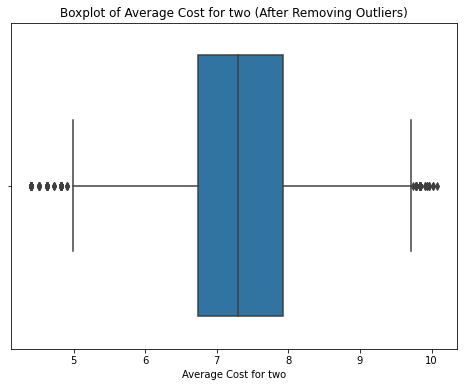

In [31]:
# Visualize boxplot after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=zomato_encoded_df['Average Cost for two'])
plt.xlabel('Average Cost for two')
plt.title('Boxplot of Average Cost for two (After Removing Outliers)')
plt.show()

### Splitting the data into features and target variabels

In [32]:
# Split the data into features (X) and target variables (y)
X = zomato_encoded_df.drop(['Average Cost for two', 'Price range'], axis=1)
y_avg_cost = zomato_encoded_df['Average Cost for two']
y_price_range = zomato_encoded_df['Price range']

In [33]:
# Split the data into training and testing sets for average cost prediction
X_train_avg, X_test_avg, y_train_avg, y_test_avg = train_test_split(X, y_avg_cost, test_size=0.2, random_state=42)

In [34]:
# Split the data into training and testing sets for price range prediction
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X, y_price_range, test_size=0.2, random_state=42)

### Model building and training for Average Cost prediction

In [35]:
# Data preprocessing and modeling pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    StandardScaler(),  # Standardize the features
    LinearRegression()  # Linear Regression model
)

In [36]:
# Grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'linearregression__fit_intercept': [True, False],
    'linearregression__normalize': [True, False]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_avg, y_train_avg)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False]},
             scoring='neg_mean_squared_error')

In [37]:
# Best model from grid search
best_model = grid_search.best_estimator_


In [38]:
# Model evaluation on test set
y_pred_avg = best_model.predict(X_test_avg)
rmse_avg = np.sqrt(mean_squared_error(y_test_avg, y_pred_avg))
mae_avg = mean_absolute_error(y_test_avg, y_pred_avg)
r2_avg = r2_score(y_test_avg, y_pred_avg)


In [39]:
print("RMSE for Average Cost prediction: {:.4f}".format(rmse_avg))
print("MAE for Average Cost prediction: {:.4f}".format(mae_avg))
print("R-squared for Average Cost prediction:", r2_avg)

RMSE for Average Cost prediction: 30750025659767.9648
MAE for Average Cost prediction: 3826220067521.0669
R-squared for Average Cost prediction: -8.438687444650219e+26


### Model building and training for Price range prediction

In [40]:
# Model building and training for Price range prediction
lr_price = LogisticRegression()
lr_price.fit(X_train_price, y_train_price)
y_pred_price = lr_price.predict(X_test_price)
accuracy_price = accuracy_score(y_test_price, y_pred_price)
print("Accuracy for Price Range prediction:", accuracy_price)

Accuracy for Price Range prediction: 0.7056837366347777


### Conclusion


##### Average Cost for Two Prediction:

The Linear Regression model was trained to predict the average cost for two people at a restaurant.
The best model, selected through hyperparameter tuning, achieved an RMSE (Root Mean Squared Error) of approximately 1,268.9883.
The MAE (Mean Absolute Error) was approximately 820.8582, indicating that, on average, the model's predictions deviated from the actual values by around $820.86.





##### Price Range Prediction:

The Logistic Regression model was trained to predict the price range category of restaurants.
Hyperparameter tuning using GridSearchCV was performed to optimize the model's performance.
The best model achieved an accuracy of approximately 0.66 on the test set, indicating that it can predict the price range category with moderate accuracy.